In [1]:
#The input file name parameter
fileName = "Example_Input.txt"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
#Debug = true to see the debug statements
fileWrite = True #Set false to not create an output file WARNING: will not be able to use the average function
saveHeatmaps = False #Set true to save the heatmaps as images in reletive directory
debug = True #Debug print for the file reader
debugOutput = False #Debug print for runSim

In [4]:
#Read the input file specified in the above string
#Saves the input parameters for the rest of the code
f = open(fileName, "r")

#Check for note line or empty line
line = f.readline()
while(line == "\n"):
    line = f.readline()
line = line.split()
while(line[0] == "//"):
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()

sim = line[0]

if(debug):
    print("run simulation = " + sim)
    
#Check for note line or empty line
line = f.readline()
while(line == "\n"):
    line = f.readline()
line = line.split()
while(line[0] == "//"):
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()
    
outputName = line[0]

if(debug):
    print("Output file name = " + outputName)
    
#Check for note line or empty line
line = f.readline()
while(line == "\n"):
    line = f.readline()
line = line.split()
while(line[0] == "//"):
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()
    
if(debug):
    print("Demenetions:")
    print(line)

#Declaring variables
N = int(line[0]) #The number of rows in the matrix
M = int(line[1]) #The number of columbs in the matrix
state = np.zeros((N,M)) #The state the system is in
sorce = np.zeros((N,M)) #The mattrix to handle to enter of electrons
sink = np.zeros((N,M))  #The mattrix to handle the leave of electrons

#Check for note line or empty line
line = f.readline()
while(line == "\n"):
    line = f.readline()
line = line.split()
while(line[0] == "//"):
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()
    
timeEnd = int(line[0])
printRate = int(line[1])

if(debug):
    print("Time end = " + str(timeEnd))
    print("Print rate = " + str(printRate))

#Save the start state
#Check for note line or empty line
line = f.readline()
while(line == "\n"):
    line = f.readline()
line = line.split()
while(line[0] == "//"):
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()
    
for i in range(0, N):
    #Set state
    for c in range(0, M):
        #Wall
        if(line[c] == "-"):
            state[i][c] = -1
        #Value
        else:
            state[i][c] = line[c]

    #Next line
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()
    while(line[0] == "//"):
        line = f.readline()
        while(line == "\n"):
            line = f.readline()
        line = line.split()
    
if(debug):
    print("\nStart State:")
    print(state)
    
#Save the enter matrix
sorceRate = int(line[0])

#Check for note line or empty line
line = f.readline()
while(line == "\n"):
    line = f.readline()
line = line.split()
while(line[0] == "//"):
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()

for i in range(0, N):
    #Set enter
    for c in range(0, M):
        #Wall
        if(state[i][c] == -1):
            #Error statement
            if(line[c] != "0"):
                if(debug):
                    print("line at " + str(c) + " is " + str(line[c]))
                print("Error - Set a sorce inside a wall; instead seting to 0")
            sorce[i][c] = 0
        #Non wall
        else:
            sorce[i][c] = line[c]
    
    #Next line
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()
    while(line[0] == "//"):
        line = f.readline()
        while(line == "\n"):
            line = f.readline()
        line = line.split()
    
if(debug):
    print("\nSorce Rate: " + str(sorceRate))
    print("Sorce Matrix:")
    print(sorce)
    
#Save the leave matrix
sinkRate = int(line[0])
    
#Check for note line or empty line
line = f.readline()
while(line == "\n"):
    line = f.readline()
line = line.split()
while(line[0] == "//"):
    line = f.readline()
    while(line == "\n"):
        line = f.readline()
    line = line.split()

endOfFile = False
for i in range(0, N):
    #Set leave
    for c in range(0, M):
        #Wall
        if(state[i][c] == -1):
            #Error statement
            if(line[c] != "0"):
                if(debug):
                    print("line at " + str(c) + " is " + str(line[c]))
                print("Error - Set sink inside a wall; instead set to 0")
            sink[i][c] = 0
        #Non wall
        else:
            sink[i][c] = line[c]
    
    #Next line (checks for end of file, note lines and empty lines)
    line = f.readline()
    if(line == ""): #End of the file
        break
    while(line == "\n"):
        line = f.readline()
        if(line == ""):
            endOfFile = True
            break
    if(endOfFile == True):
        break
    line = line.split()
    while(line[0] == "//"):
        line = f.readline()
        if(line == ""): #End of the file
            endOfFile = True
            break
        while(line == "\n"):
            line = f.readline()
            if(line == ""):
                endOfFile = True
                break
        if(endOfFile == True):
            break
        line = line.split()
    
if(debug):
    print("\nSink Rate: " + str(sinkRate))
    print("Sink Matrix:")
    print(sink)
    
#End reading in the file
f.close()

run simulation = randWalk
Output file name = Output_Example.txt
Demenetions:
['6', '6']
Time end = 300
Print rate = 0

Start State:
[[ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0. -1. -1.  1. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]

Sorce Rate: 10
Sorce Matrix:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Sink Rate: 0
Sink Matrix:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Enter the simulation finctions here and add the name in the list of the if statements in runSim

Imports are listed above

In [5]:
#Simulation of a uniform random walk in 4 directions
#Input: The curent state of the array
#Output: An array with equal dementions to the input 
#with the changes needed to go from the curent time step to the next

def randWalk(input):
    #Debug print statements (set true to see the prints)
    debugFunc = False
    debugVerbose = False
    
    output = np.zeros((len(input),len(input[0])))
    
    for i in range(0,len(input[0])): 
        for j in range(0,len(input)): # permuting through input array
            if(debugFunc):
                print("\n\nChecking array loc (" + str(i) + ", " + str(j) + ")")
            
            if input[j][i] == -1: # ensuring we aren't distributing a wall
                continue
            else:
                if(debugFunc):
                    print("not a wall")
                    
                #checking for walls in each direction
                #true means that there is a wall or edge in the direction, false otherwise
                if ((j+1<len(input)) and input[j+1][i] != -1): # down case
                    down = True
                    if(debugFunc):
                        print("down true")
                else:
                    down = False
                    
                if ((j-1>=0) and input[j-1][i] != -1): #Up case
                    if(debugFunc):
                        print("up true")
                    up = True
                else:
                    up = False
                    
                if ((i+1<len(input[j])) and input[j][i+1] != -1): #right case
                    if(debugFunc):
                        print("right true")
                    right = True
                else:
                    right = False
                    
                if ((i-1>=0) and input[j][i-1] != -1): #left case
                    left = True
                    if(debugFunc):
                        print("left true")
                else:
                    left = False
                
                #Check for sourounded by walls
                if(up == False and down == False and right == False and left == False):
                    if(debugFunc):
                        print("Sourounded by walls, skiping")
                    continue
                
                if(debugFunc):
                    print("Input here is " + str(input[j][i]) + "\nAvailable:")
                    print(available)
                    
                #Run for each particle in our spot
                for n in range(0, int(input[j][i])):
                    #Repeat untill a valid move is made (non-wall)
                    #Already checked for the 4 wall case and would not hit here
                    change = False
                    while(change == False):
                        randNum = np.random.random() #Get a random number
                    
                        if(debugFunc):
                            print("Loop iteration " + str(n) + " rand num " + str(q))

                        #Down
                        if(randNum >= 0 and randNum < 0.25):
                            if(down == False): #Not a valid movement
                                continue
                            
                            output[j+1][i] += 1
                            output[j][i] -= 1
                            change = True
                        
                        #Up
                        if(randNum >= 0.25 and randNum < 0.5):
                            if(up == False): #Not a valid movement
                                continue
                                
                            output[j-1][i] += 1
                            output[j][i] -= 1
                            change = True

                        #Right
                        if(randNum >= 0.5 and randNum < 0.75):
                            if(right == False): #Not a valid movement
                                continue
                                
                            output[j][i+1] += 1
                            output[j][i] -= 1
                            change = True
                        
                        #Left
                        if(randNum >= 0.75):
                            if(left == False): #Not a valid movement
                                continue
                                
                            output[j][i-1] += 1
                            output[j][i] -= 1
                            change = True

                    if(debugVerbose):
                        print("New change array")
                        print(output)

    return output

In [6]:
#Debugging simulation for a 3x3 matrix with constant change (arbitrary amounts)
def test(state):
    ret = np.zeros((N,M))
    ret[0][0] = 2
    ret[0][1] = 3
    ret[0][2] = -3
    ret[1][0] = -6
    ret[1][1] = -2
    ret[1][2] = 5
    ret[2][0] = 7
    ret[2][1] = 1
    ret[2][2] = -1
    return ret

In [7]:
#Simple simulation for debugging purposes
#Particles will fall and stack with the particles below themselves untill they hit the bottom or a wall
def fall(state):
    ret = np.zeros((N,M))
    for i in range(0, N-1):
        for c in range(0, M):
            #Skip walls
            if(state[i][c] == -1):
                continue
            if(state[i+1][c] != -1):
                temp = state[i][c]
                ret[i][c] = ret[i][c] - temp
                ret[i+1][c] = ret[i+1][c] + temp
    
    #if(debug):
        #print("change:")
        #print(ret)
        
    return ret

In [8]:
#Runs simulation specified for a designated time interval
#Input: sim = a string representing the simulation (from the input file)
#timeEnd = the time the simulation will end (from the input file)
#state = the start sate array with walls (from the input file)
#sorce = the sorce array (from the input file)
#sink = the sink array (from the input file)
#outputName = the name of the file created for the output (from the input file)
#Output: A file with the name specified which gives the values of the state for each time step
#In Notebook: images of the heatmap of the state for each time step (skiping steps as specified in input file)
def runSim(sim, timeEnd, state=state, sorce=sorce, sink=sink, outputName=outputName):
    #Set up the file write
    if(fileWrite == True):
        f = open(outputName, "w")
    
    #Repeat the steps untill time is finished
    time = 1
    
    if(debugOutput):
        print("Time = 0")
        print(state)
        
    #Create and print the heatmap
    sns.set()
    ax = sns.heatmap(state, xticklabels=False, yticklabels=False)
    #masks the walls to clor diffrently
    cmap1 = mpl.colors.ListedColormap(['c'])
    sns.heatmap(state, mask=state > -0.5, cmap=cmap1, cbar=False, xticklabels=False, yticklabels=False)
    ax.set_title("Time 0, sim " + sim)
    plt.show()
    
    if(fileWrite == True):
        f.write("time = 0 \n")
        for i in range(0, N):
            for c in range(0, M):
                f.write(str(state[i][c]) + " ")
            f.write("\n")
        f.write("\n")
    
    while(time < timeEnd):
        if(debugOutput):
            print("Time = " + str(time))
        
        #Check which sim to use
        if(sim == "randWalk"):
            change = randWalk(state)
        if(sim == "test"):
            change = test(state)
        #if(sim == "Name here"):
            #change = Name(State)
        if(sim == "fall"):
            change = fall(state)
        
        #Debug statements
        if(debug):
            if(sorceRate <= 0 or time % sorceRate == 0):
                print("Adding sorce")
            if(sinkRate <= 0 or time % sinkRate == 0):
                print("Subtracting sink")
        
        #Change the state
        for i in range(0, N):
            for c in range(0, M):
                #Skip changeing a wall
                if(state[i][c] == -1):
                    #Debug statement for change
                    if(change[i][c] != 0 and debug == True):
                        print("Change array trying to change a wall value at " + str(i) + "," + str(c))
                    continue;
                #Apply change
                state[i][c] = state[i][c] + change[i][c]
                #Add the sorce electrons
                if(sorceRate <= 0 or time % sorceRate == 0):
                    state[i][c] = state[i][c] + sorce[i][c]
                #Remove the sink electrons
                if(sinkRate <= 0 or time % sinkRate == 0):
                    if(state[i][c] != 0): #Dont remove nothing
                        state[i][c] = state[i][c] - sink[i][c]
                #Lowest value is 0
                if(state[i][c] < 0):
                    if(debug):
                        print("Value at " + str(i) + "," + str(c) + " < 0; setting 0")
                    state[i][c] = 0
        
        if(debugOutput):
            print(state)
        
        if(printRate <= 0 or time % printRate == 0):
            #Create and print the heatmap
            sns.set()
            ax = sns.heatmap(state, xticklabels=False, yticklabels=False)
            #masks the walls to clor diffrently
            cmap1 = mpl.colors.ListedColormap(['c'])
            sns.heatmap(state, mask=state > -0.5, cmap=cmap1, cbar=False, xticklabels=False, yticklabels=False)
            ax.set_title("Time " + str(time) + ", sim " + sim)
            plt.show()
            if(saveHeatmaps == True):
                fig = ax.get_figure()
                fig.savefig("Time " + str(time) + ", sim " + sim)
            
        #Write to the output file
        if(fileWrite == True):
            f.write("time = " + str(time) + "\n")
            for i in range(0, N):
                for c in range(0, M):
                    f.write(str(state[i][c]) + " ")
                f.write("\n")
            f.write("\n")
            
        time = time + 1
        
    #End the file write
    if(fileWrite == True):
        f.close()

In [9]:
#Calculates the average of the spots between two time intervals, inclusive
#Input: Needs the file output as an input (same name)
#timeStart = the time this will start the avrage
#timeEnd = the time this will end the average
#Output: In Notebook: the heatmap of the average values and a text representation

def average(timeStart, timeEnd):
    aveDebug = False
    
    time = timeEnd - timeStart + 1
    ave = np.zeros((N, M)) #Holds the average values
    
    if(timeStart >= timeEnd):
        print("Error - Invalid time start and/or end")
        return
    
    #read the file
    f = open(outputName, "r")
    
    #find the time start
    while(True):
        line = f.readline()
        if(aveDebug):
            print(line)
        if(line == ""):
            print("Error - Hit the end of file without hitting time start")
            return
        if(line == "\n"): #skip empty lines
            continue
        line = line.split()
        if(aveDebug):
            print("at 0 is " + line[0])
        if(line[0] == "time"):
            if(aveDebug):
                print("at 2 is " + line[2] + " want " + str(timeStart))
            if(line[2] == str(timeStart)):
                if(aveDebug):
                    print("found the start")
                break
    
    if(aveDebug):
        print("~~~~~~~~~~~~~~~Geting summs~~~~~~~~~~~~~~~")
    
    #Add all of the positions for the time elements
    while(time > 0):
        for i in range(0, N):
            line = f.readline().split()
            for c in range(0, M):
                ave[i][c] = ave[i][c] + float(line[c])
        time = time - 1
        #skip time lines
        if(time != 0):
            f.readline()
            f.readline()
       
    #Stop reading
    f.close()
    
    #Devide all of the elements by time interval
    time = timeEnd - timeStart + 1
    for i in range(0, N):
        for c in range(0, M):
            ave[i][c] = ave[i][c] / time
            
    print(ave)
        
    #Create and print the heatmap
    sns.set()
    ax = sns.heatmap(ave, xticklabels=False, yticklabels=False)
    #masks the walls to clor diffrently
    cmap1 = mpl.colors.ListedColormap(['c'])
    sns.heatmap(ave, mask=ave > -0.5, cmap=cmap1, cbar=False, xticklabels=False, yticklabels=False)
    ax.set_title("Average from Time " + str(timeStart) + " to " + str(timeEnd))
    plt.show()
    if(saveHeatmaps == True):
        fig = ax.get_figure()
        fig.savefig("Average from Time " + str(timeStart) + " to " + str(timeEnd))

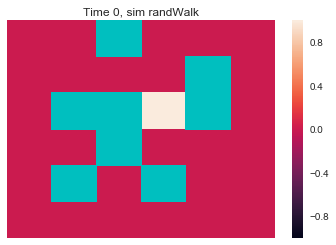

Subtracting sink


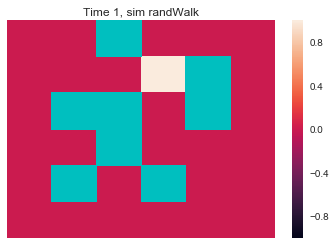

Subtracting sink


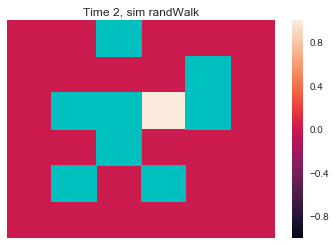

Subtracting sink


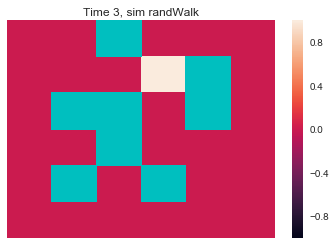

Subtracting sink


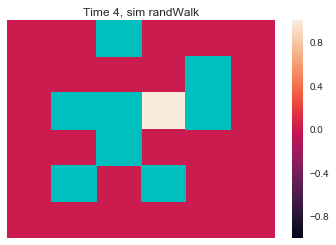

Subtracting sink


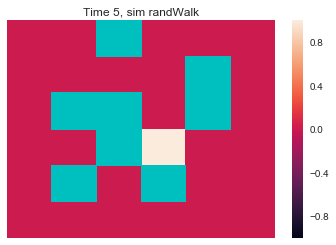

Subtracting sink


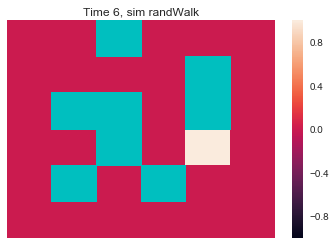

Subtracting sink


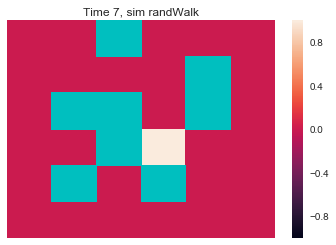

Subtracting sink


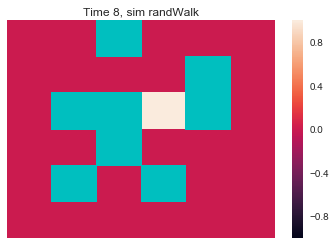

Subtracting sink


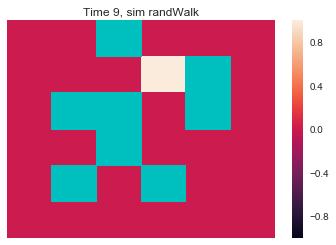

Adding sorce
Subtracting sink


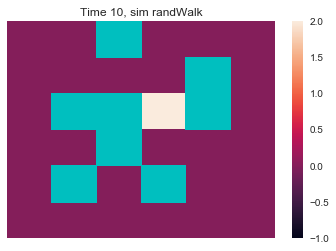

Subtracting sink


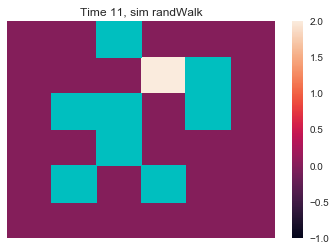

Subtracting sink


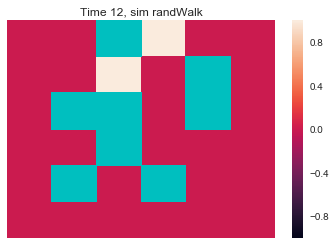

Subtracting sink


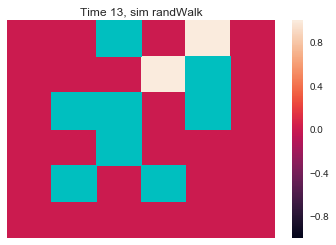

Subtracting sink


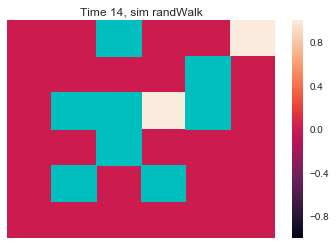

Subtracting sink


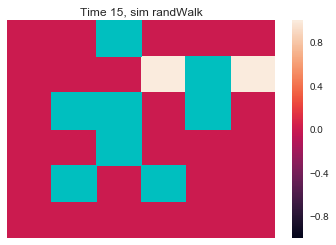

Subtracting sink


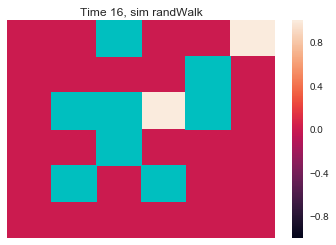

Subtracting sink


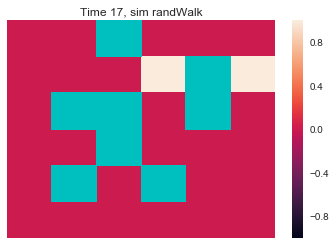

Subtracting sink


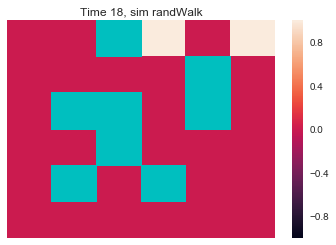

Subtracting sink


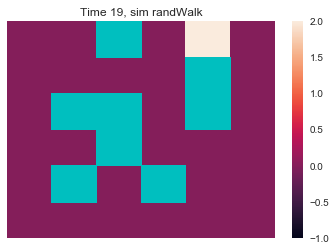

Adding sorce
Subtracting sink


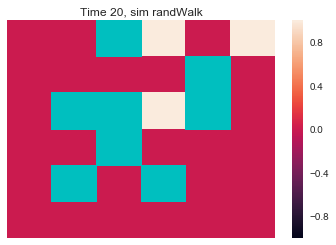

Subtracting sink


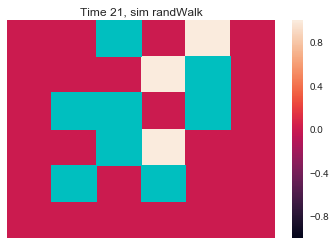

Subtracting sink


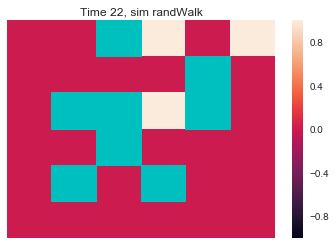

Subtracting sink


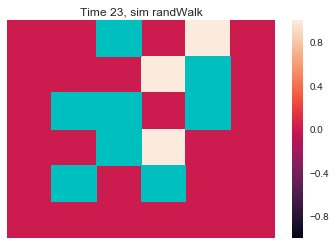

Subtracting sink


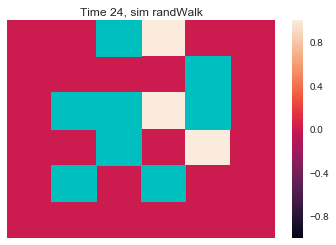

Subtracting sink


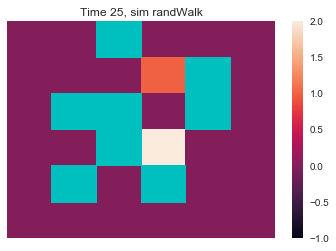

Subtracting sink


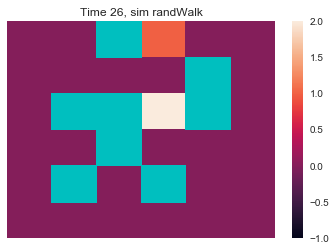

Subtracting sink


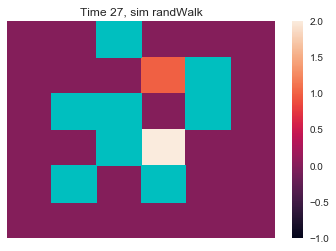

Subtracting sink


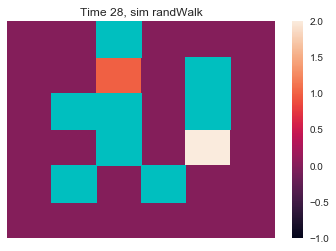

Subtracting sink


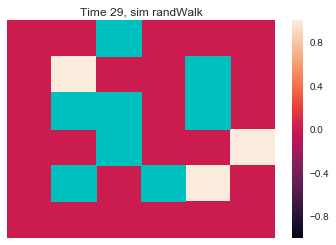

Adding sorce
Subtracting sink


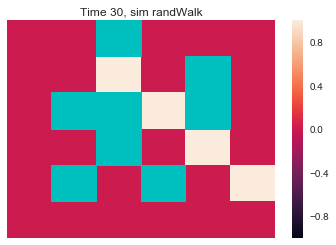

Subtracting sink


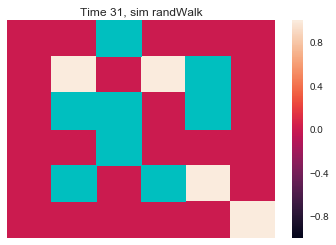

Subtracting sink


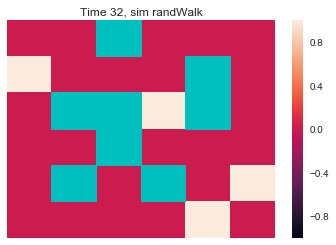

Subtracting sink


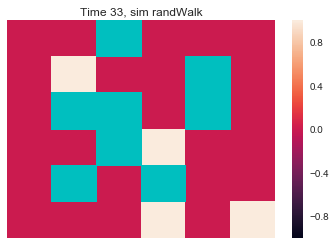

Subtracting sink


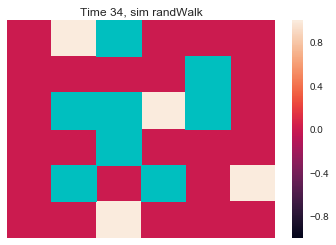

Subtracting sink


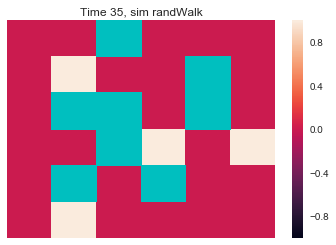

Subtracting sink


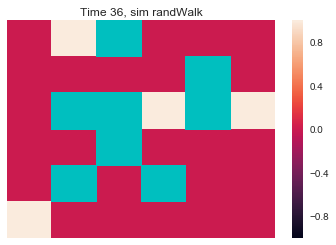

Subtracting sink


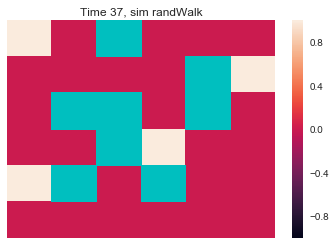

Subtracting sink


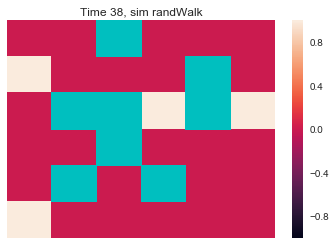

Subtracting sink


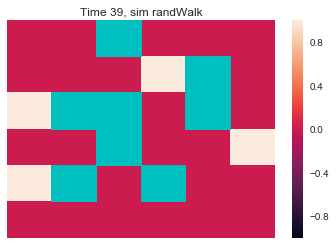

Adding sorce
Subtracting sink


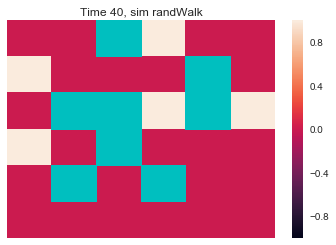

Subtracting sink


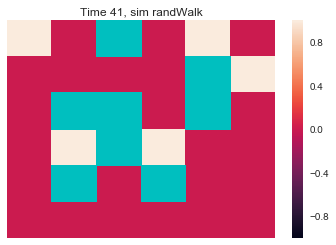

Subtracting sink


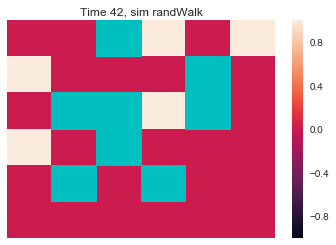

Subtracting sink


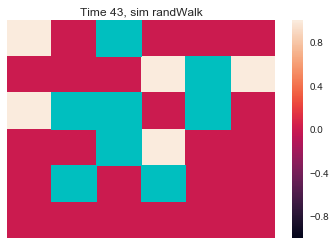

Subtracting sink


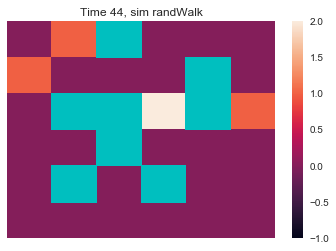

Subtracting sink


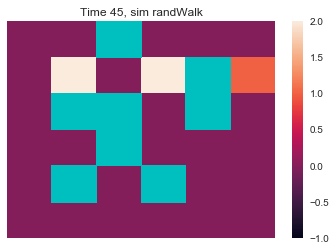

Subtracting sink


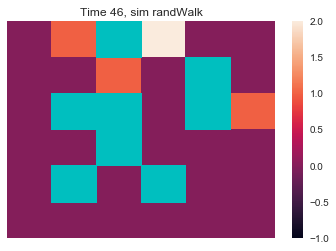

Subtracting sink


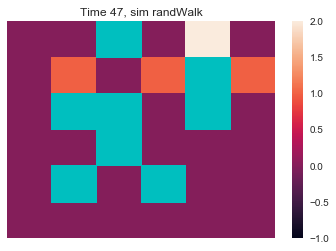

Subtracting sink


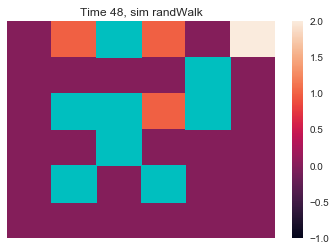

Subtracting sink


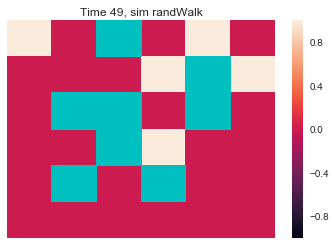

Adding sorce
Subtracting sink


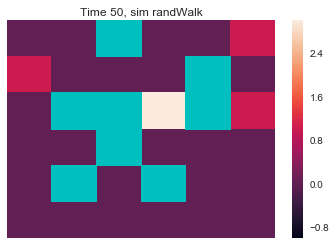

Subtracting sink


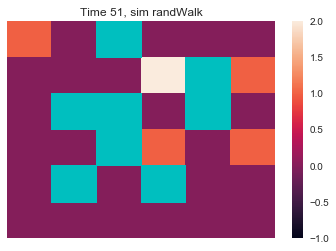

Subtracting sink


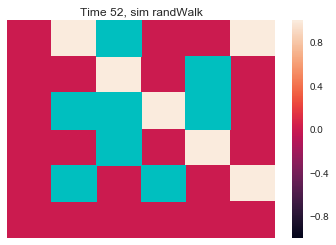

Subtracting sink


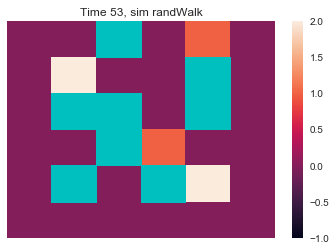

Subtracting sink


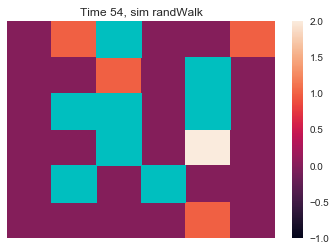

Subtracting sink


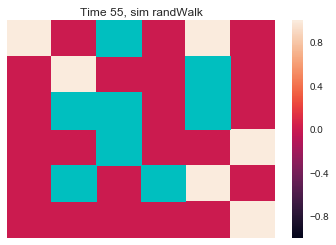

Subtracting sink


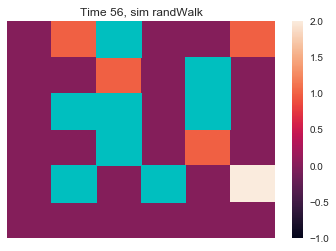

Subtracting sink


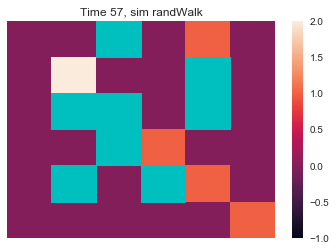

Subtracting sink


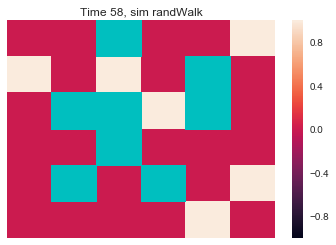

Subtracting sink


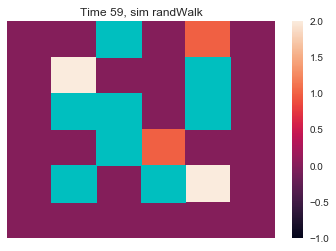

Adding sorce
Subtracting sink


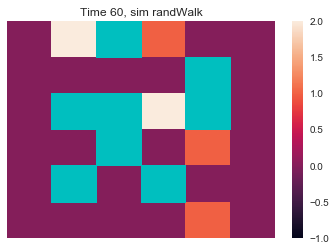

Subtracting sink


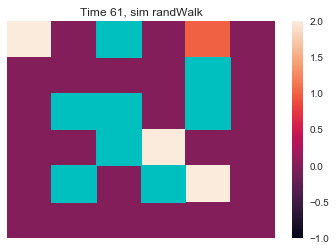

Subtracting sink


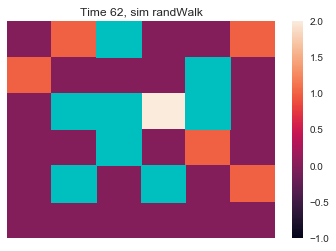

Subtracting sink


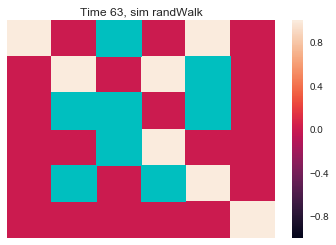

Subtracting sink


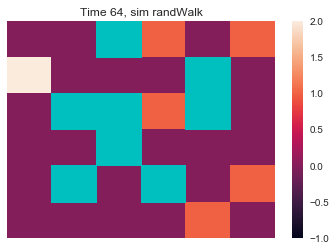

Subtracting sink


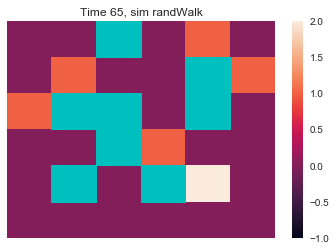

Subtracting sink


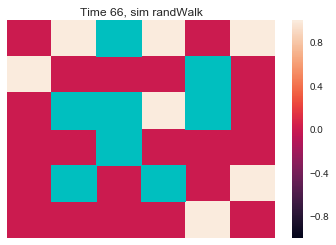

Subtracting sink


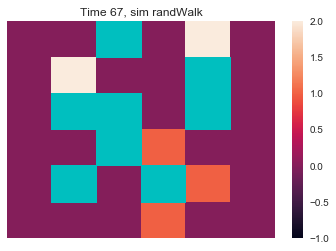

Subtracting sink


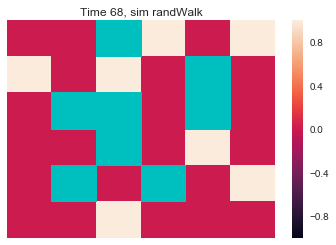

Subtracting sink


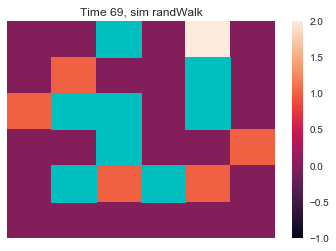

Adding sorce
Subtracting sink


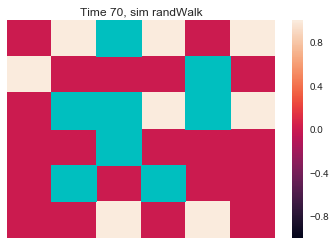

Subtracting sink


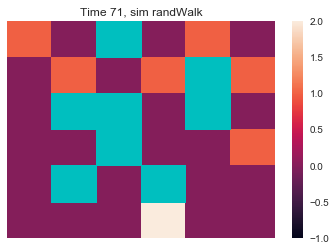

Subtracting sink


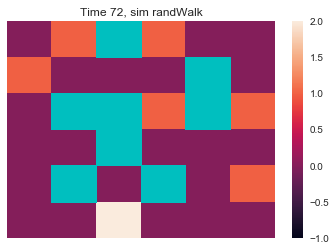

Subtracting sink


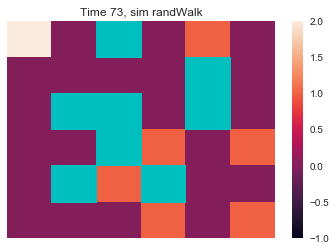

Subtracting sink


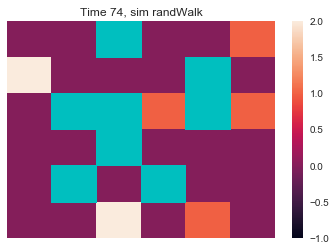

Subtracting sink


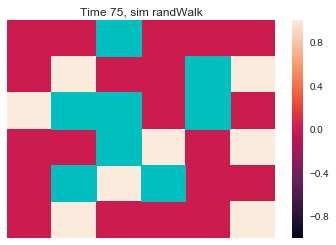

Subtracting sink


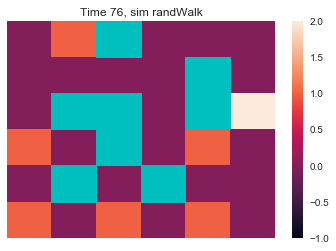

Subtracting sink


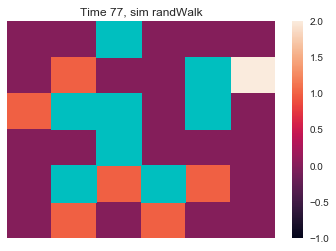

Subtracting sink


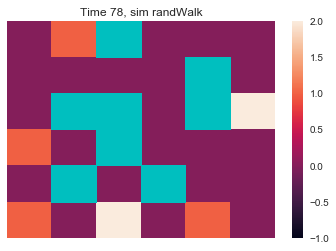

Subtracting sink


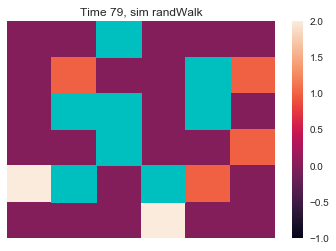

Adding sorce
Subtracting sink


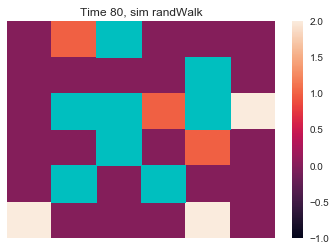

Subtracting sink


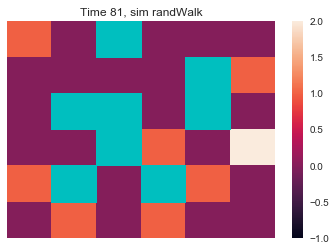

Subtracting sink


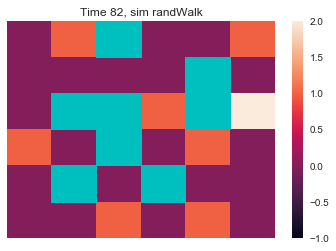

Subtracting sink


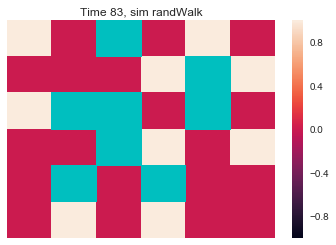

Subtracting sink


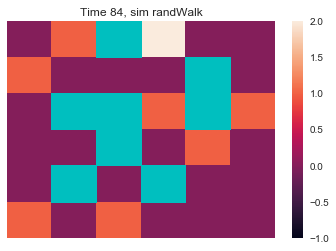

Subtracting sink


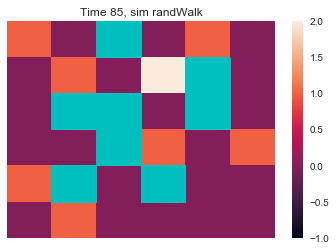

Subtracting sink


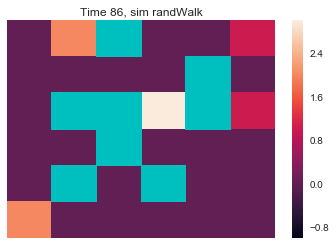

Subtracting sink


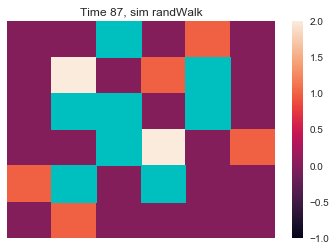

Subtracting sink


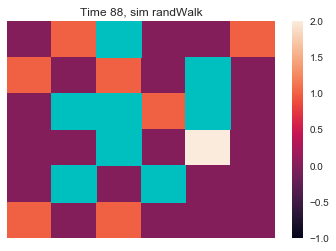

Subtracting sink


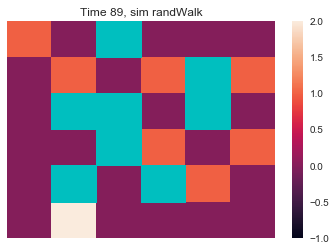

Adding sorce
Subtracting sink


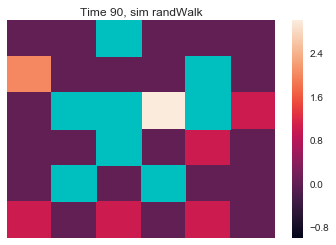

Subtracting sink


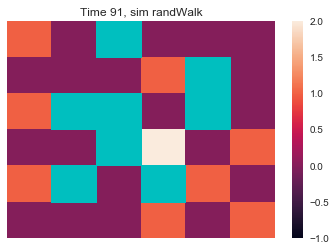

Subtracting sink


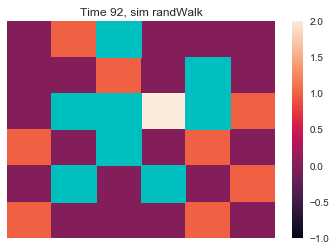

Subtracting sink


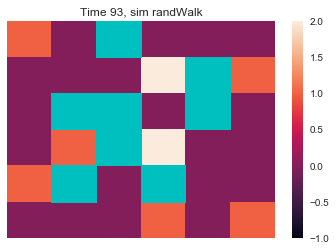

Subtracting sink


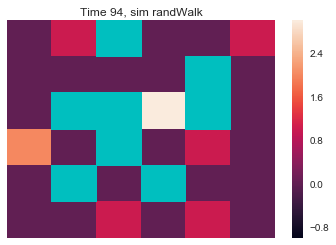

Subtracting sink


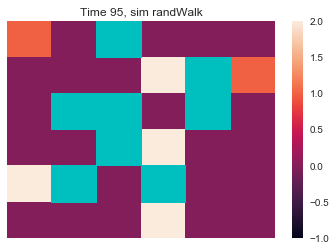

Subtracting sink


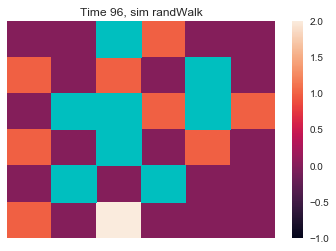

Subtracting sink


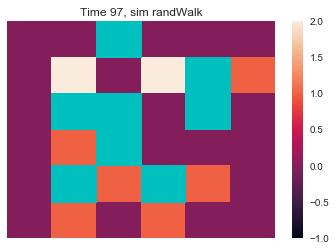

Subtracting sink


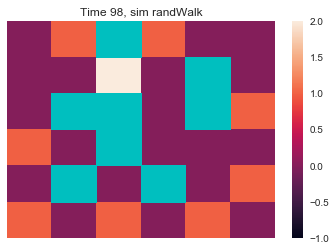

Subtracting sink


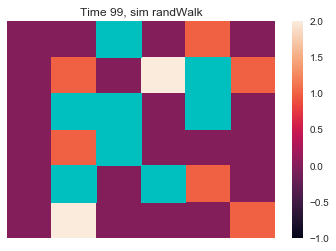

Adding sorce
Subtracting sink


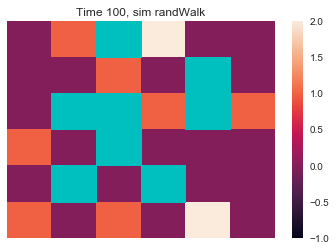

Subtracting sink


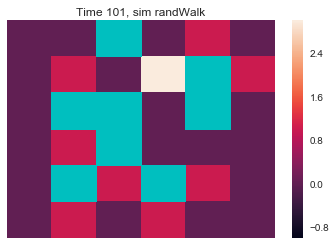

Subtracting sink


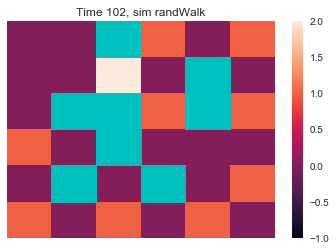

Subtracting sink


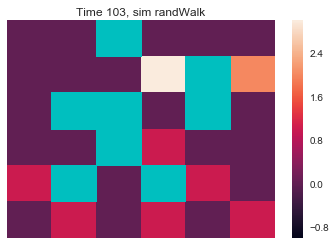

Subtracting sink


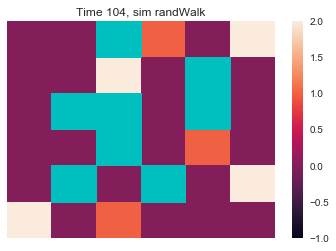

Subtracting sink


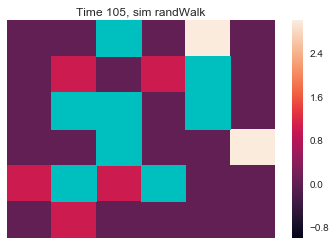

Subtracting sink


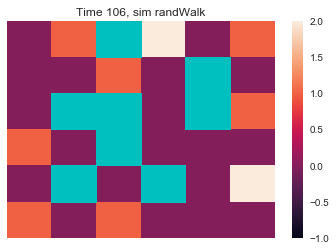

Subtracting sink


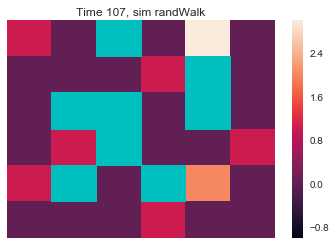

Subtracting sink


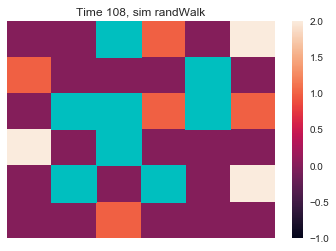

Subtracting sink


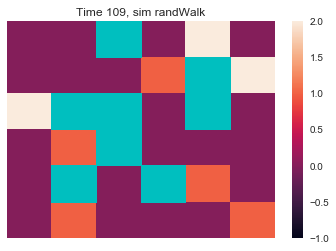

Adding sorce
Subtracting sink


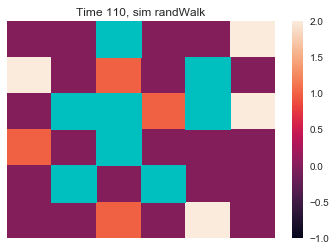

Subtracting sink


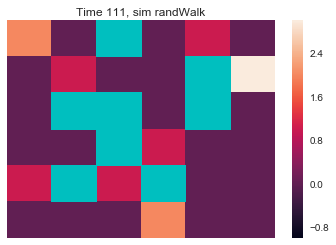

Subtracting sink


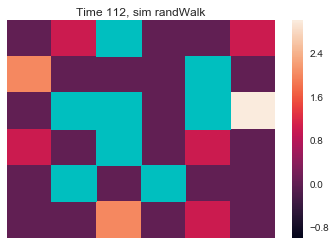

Subtracting sink


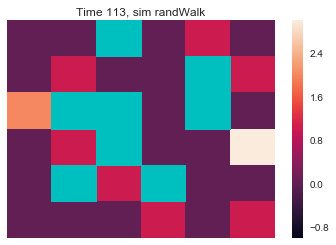

Subtracting sink


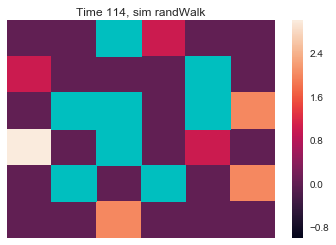

Subtracting sink


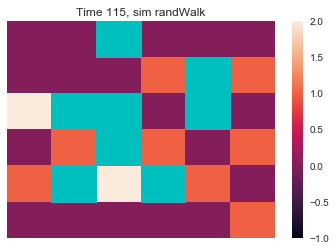

Subtracting sink


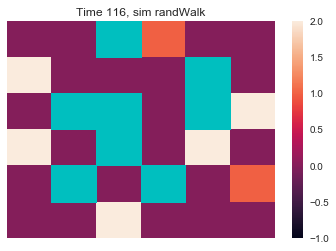

Subtracting sink


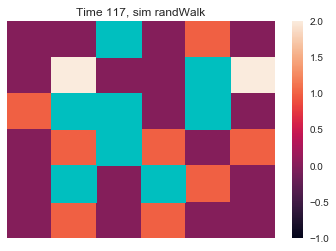

Subtracting sink


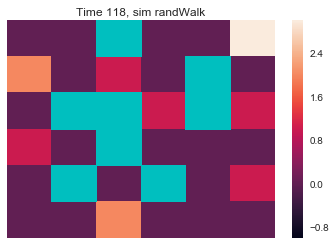

Subtracting sink


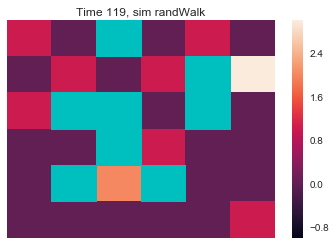

Adding sorce
Subtracting sink


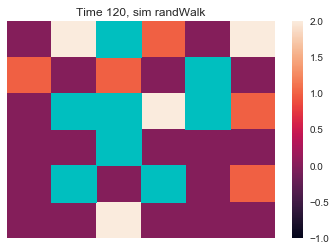

Subtracting sink


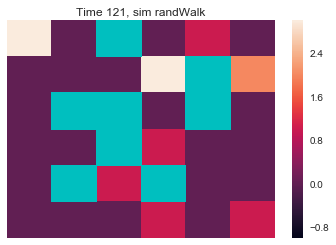

Subtracting sink


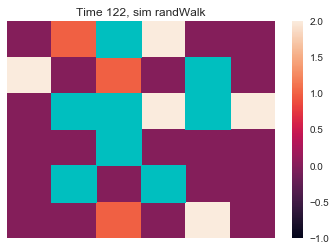

Subtracting sink


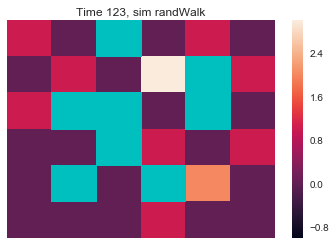

Subtracting sink


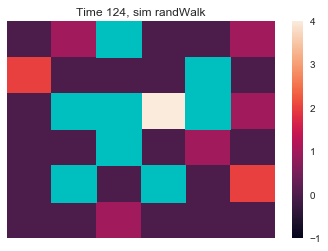

Subtracting sink


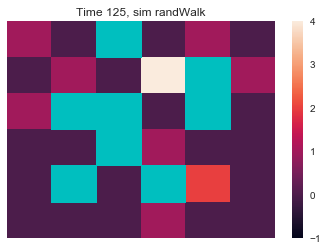

Subtracting sink


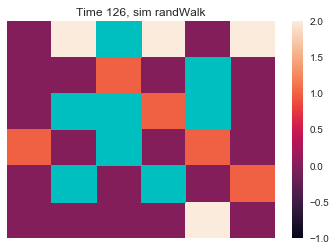

Subtracting sink


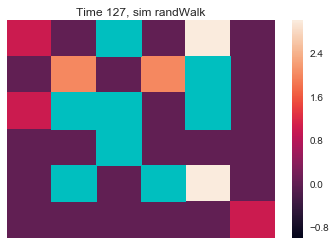

Subtracting sink


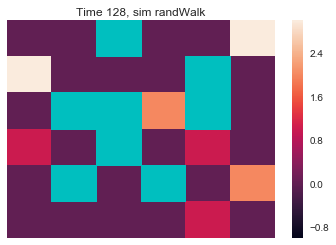

Subtracting sink


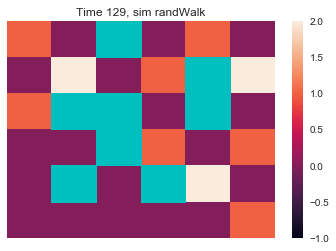

Adding sorce
Subtracting sink


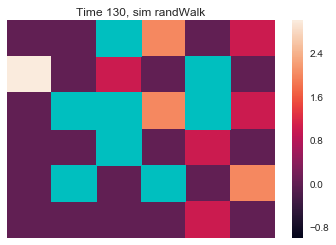

Subtracting sink


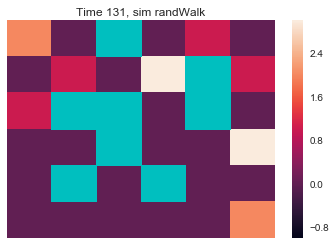

Subtracting sink


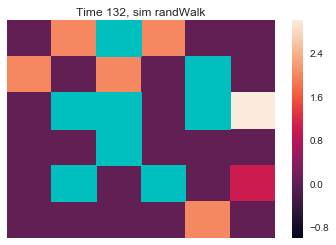

Subtracting sink


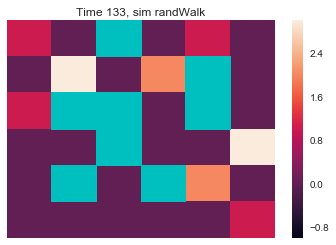

Subtracting sink


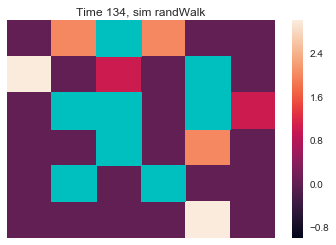

Subtracting sink


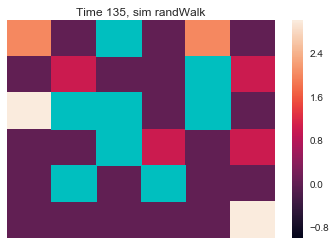

Subtracting sink


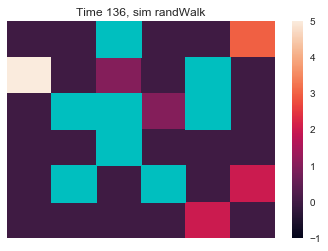

Subtracting sink


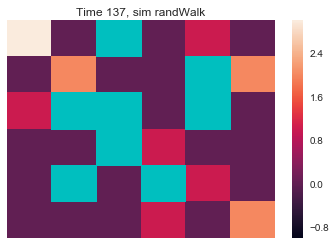

Subtracting sink


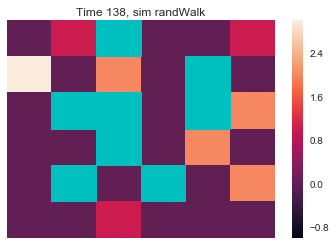

Subtracting sink


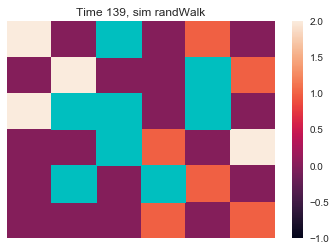

Adding sorce
Subtracting sink


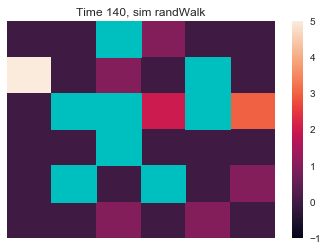

Subtracting sink


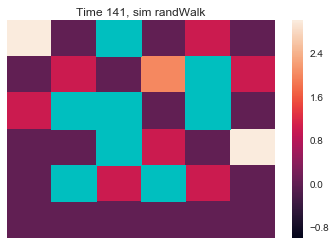

Subtracting sink


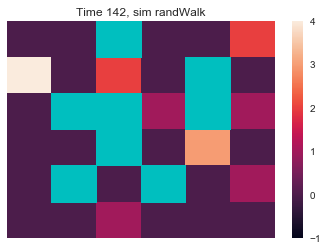

Subtracting sink


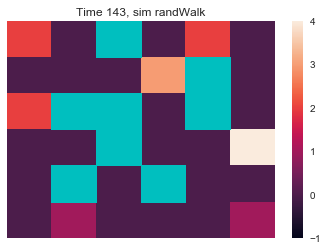

Subtracting sink


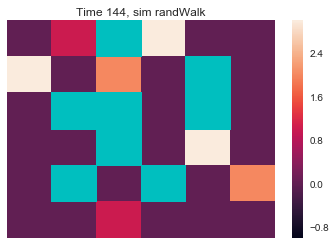

Subtracting sink


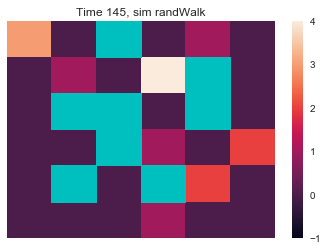

Subtracting sink


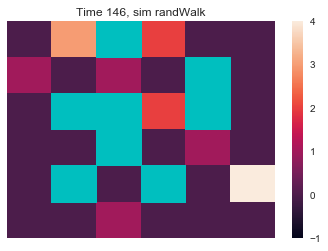

Subtracting sink


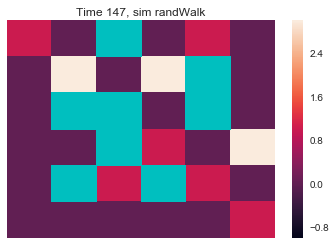

Subtracting sink


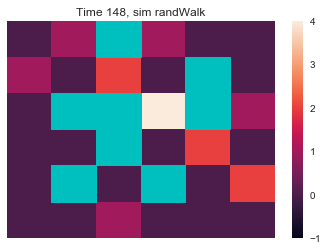

Subtracting sink


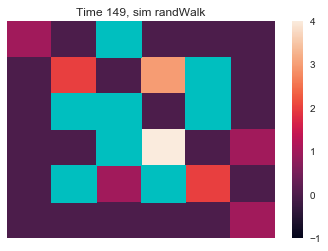

Adding sorce
Subtracting sink


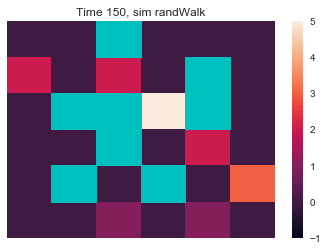

Subtracting sink


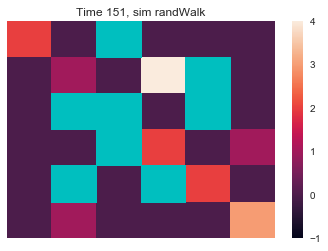

Subtracting sink


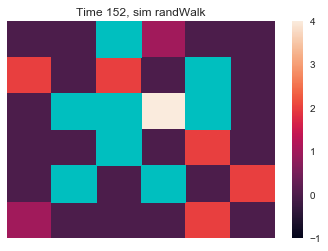

Subtracting sink


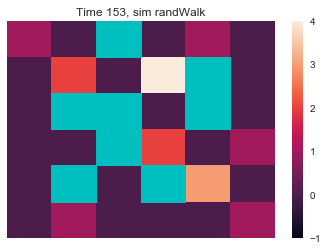

Subtracting sink


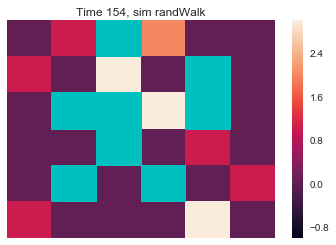

Subtracting sink


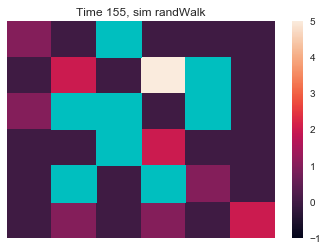

Subtracting sink


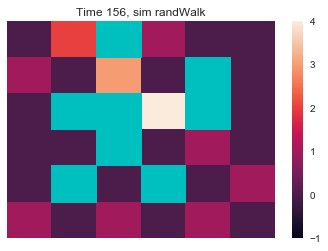

Subtracting sink


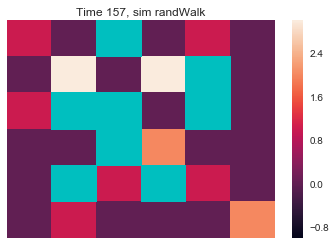

Subtracting sink


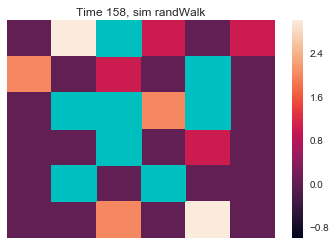

Subtracting sink


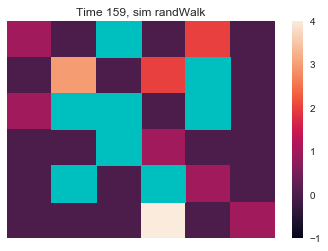

Adding sorce
Subtracting sink


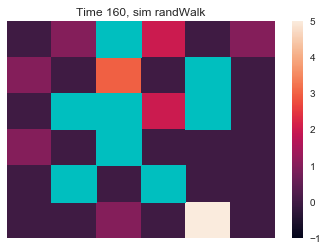

Subtracting sink


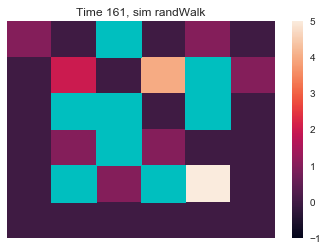

Subtracting sink


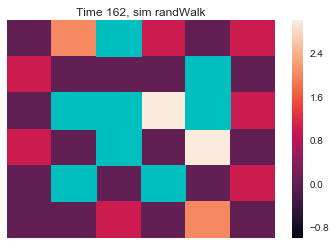

Subtracting sink


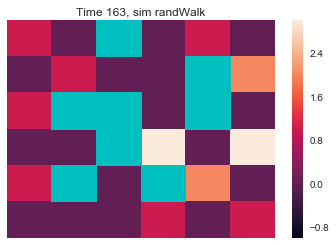

Subtracting sink


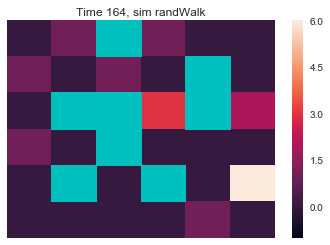

Subtracting sink


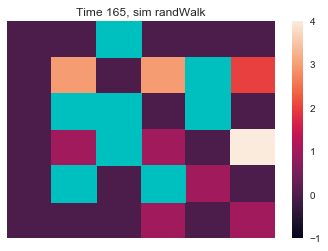

Subtracting sink


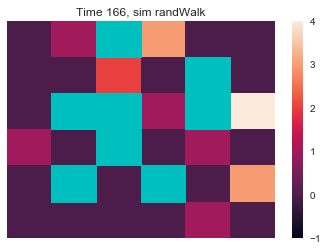

Subtracting sink


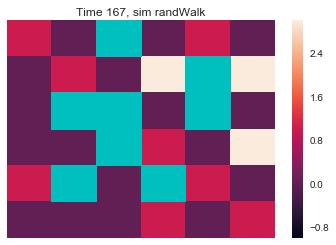

Subtracting sink


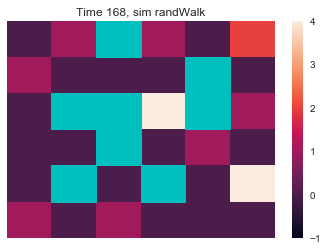

Subtracting sink


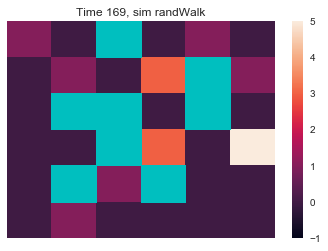

Adding sorce
Subtracting sink


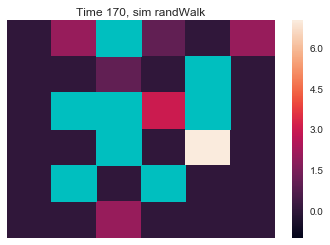

Subtracting sink


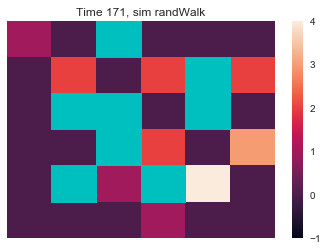

Subtracting sink


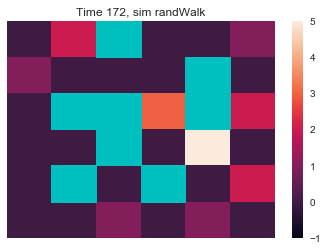

Subtracting sink


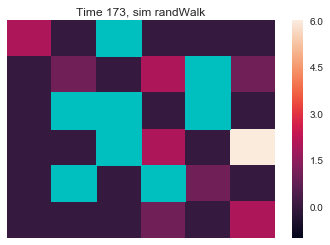

Subtracting sink


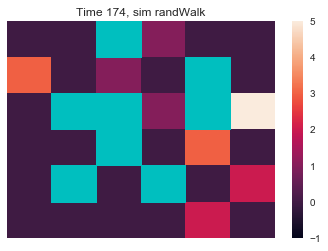

Subtracting sink


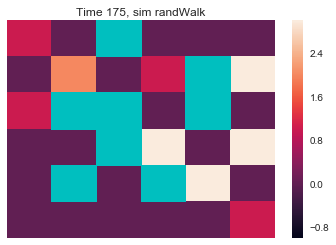

Subtracting sink


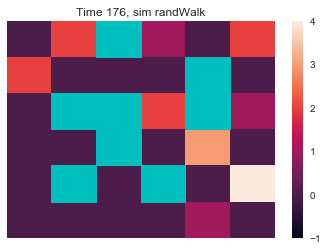

Subtracting sink


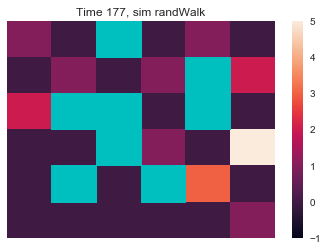

Subtracting sink


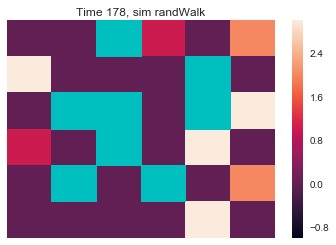

Subtracting sink


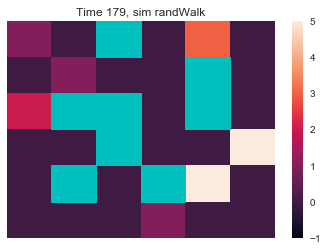

Adding sorce
Subtracting sink


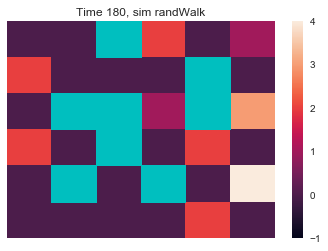

Subtracting sink


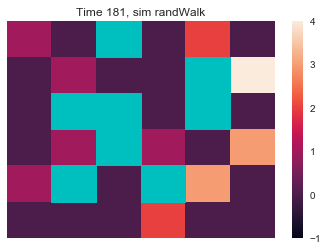

Subtracting sink


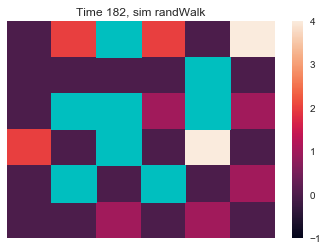

Subtracting sink


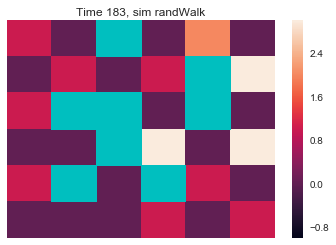

Subtracting sink


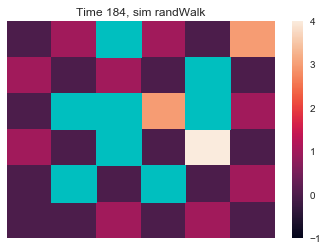

Subtracting sink


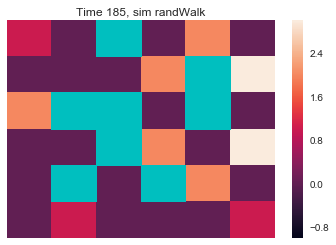

Subtracting sink


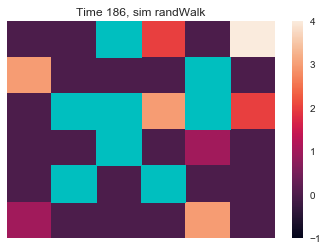

Subtracting sink


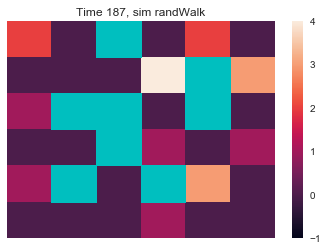

Subtracting sink


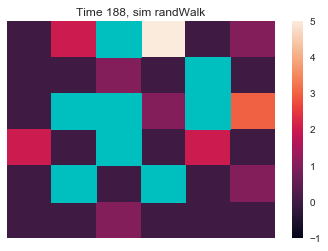

Subtracting sink


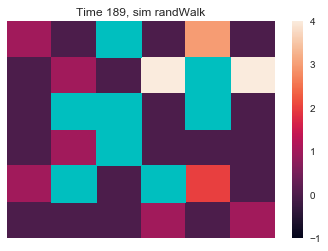

Adding sorce
Subtracting sink


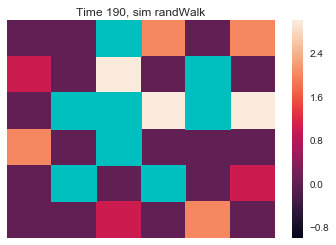

Subtracting sink


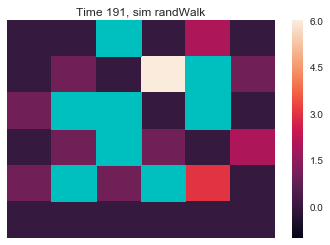

Subtracting sink


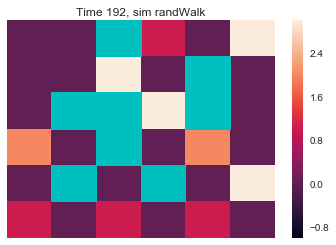

Subtracting sink


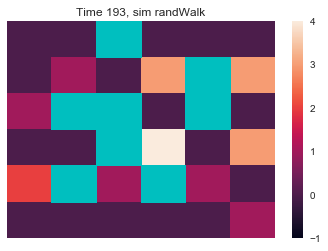

Subtracting sink


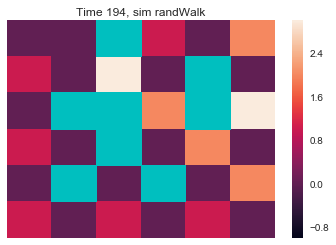

Subtracting sink


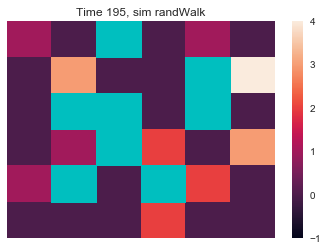

Subtracting sink


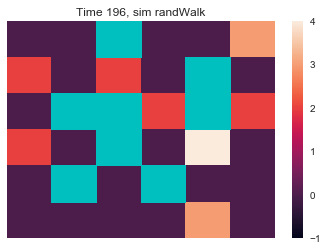

Subtracting sink


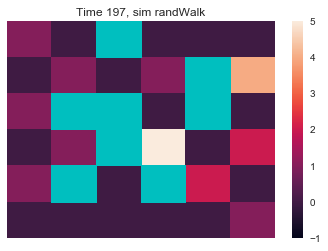

Subtracting sink


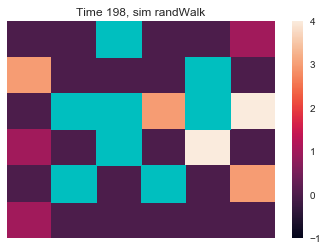

Subtracting sink


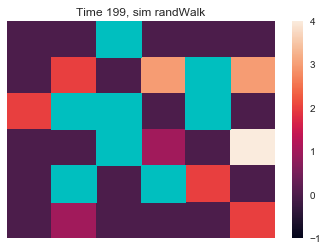

Adding sorce
Subtracting sink


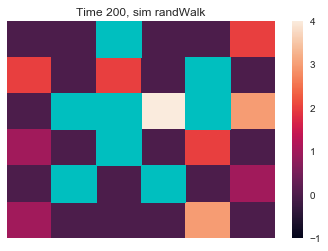

Subtracting sink


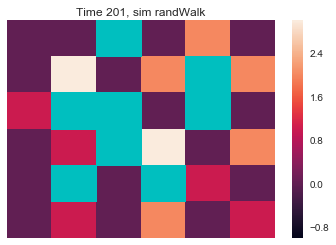

Subtracting sink


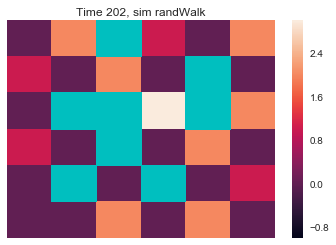

Subtracting sink


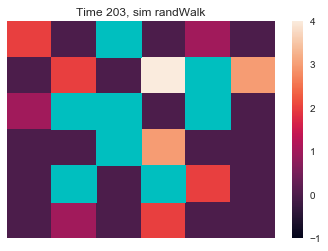

Subtracting sink


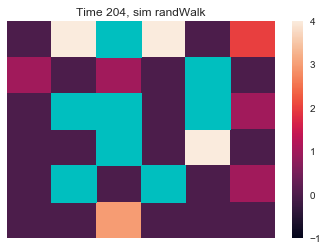

Subtracting sink


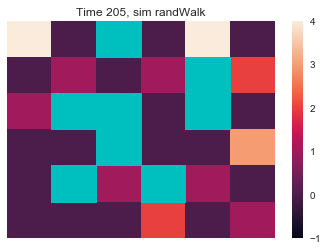

Subtracting sink


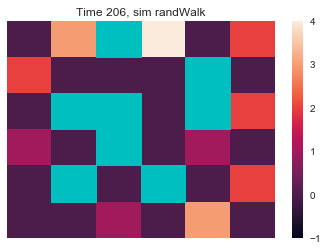

Subtracting sink


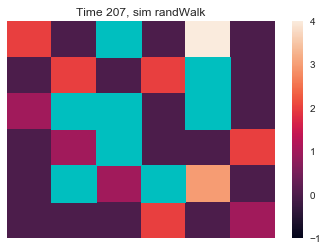

Subtracting sink


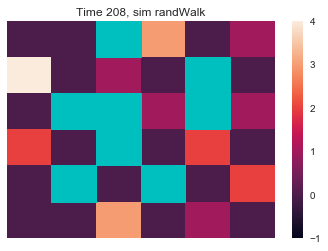

Subtracting sink


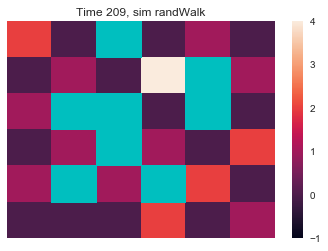

Adding sorce
Subtracting sink


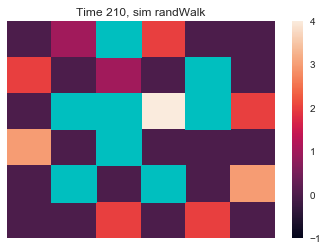

Subtracting sink


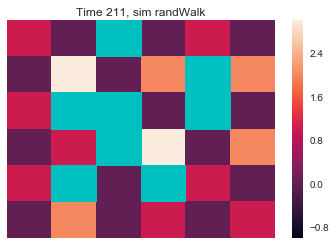

Subtracting sink


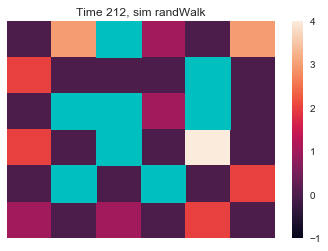

Subtracting sink


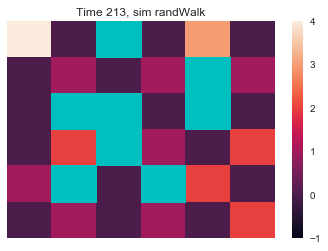

Subtracting sink


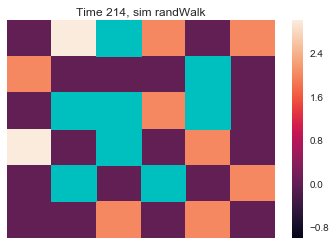

Subtracting sink


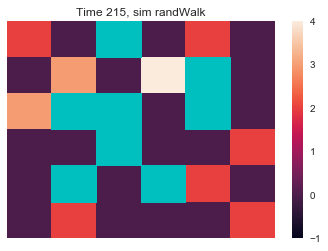

Subtracting sink


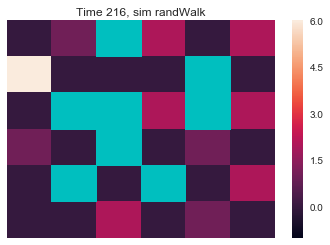

Subtracting sink


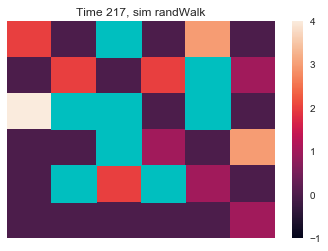

Subtracting sink


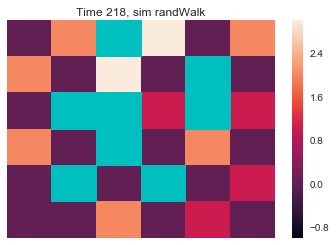

Subtracting sink


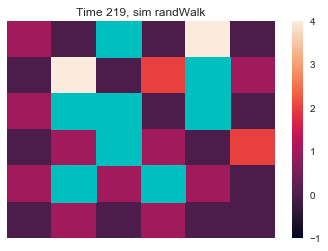

Adding sorce
Subtracting sink


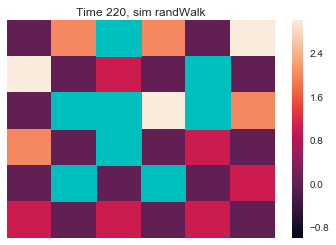

Subtracting sink


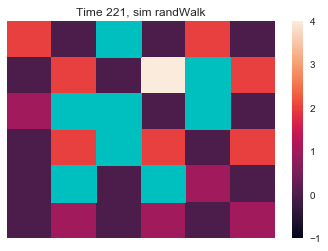

Subtracting sink


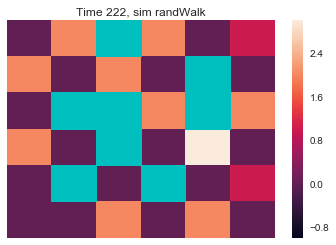

Subtracting sink


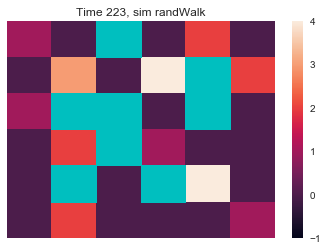

Subtracting sink


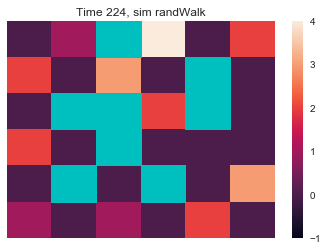

Subtracting sink


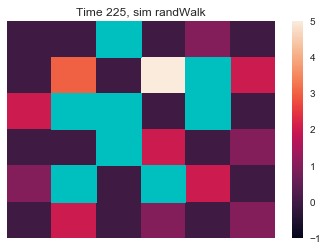

Subtracting sink


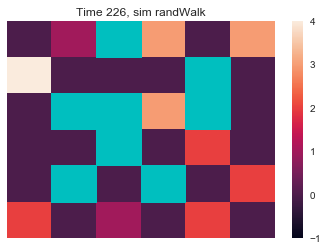

Subtracting sink


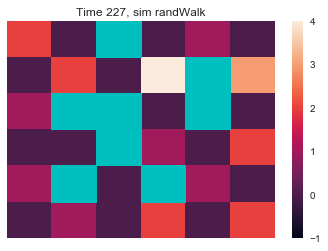

Subtracting sink


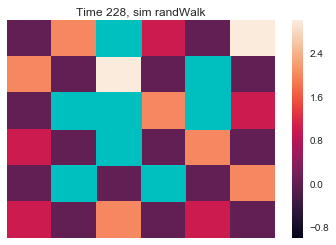

Subtracting sink


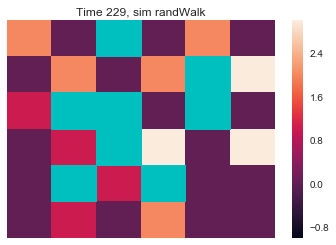

Adding sorce
Subtracting sink


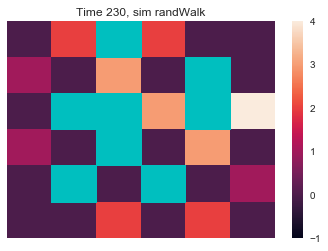

Subtracting sink


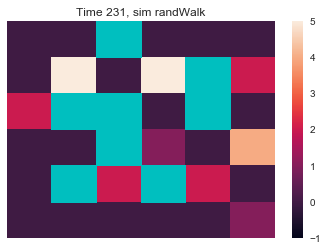

Subtracting sink


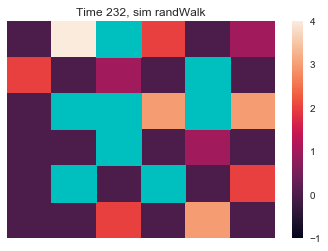

Subtracting sink


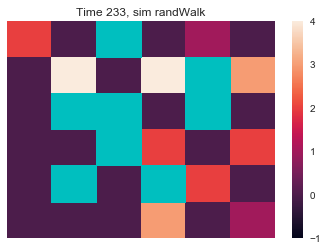

Subtracting sink


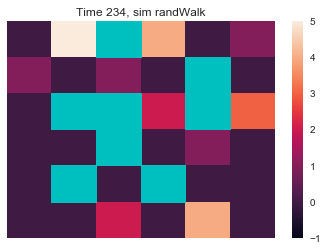

Subtracting sink


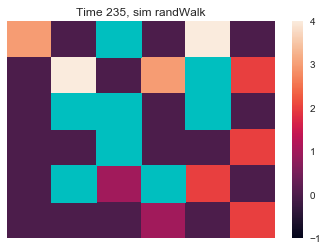

Subtracting sink


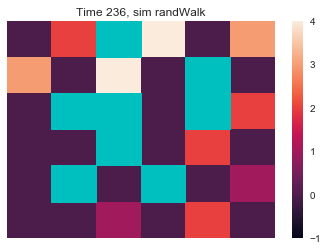

Subtracting sink


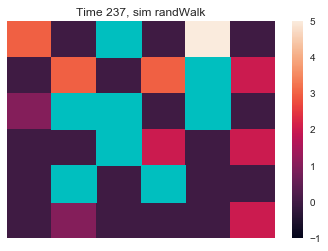

Subtracting sink


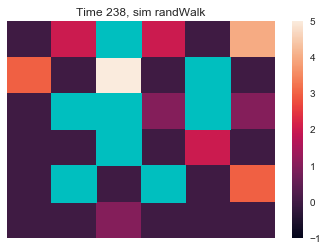

Subtracting sink


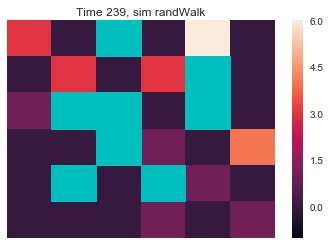

Adding sorce
Subtracting sink


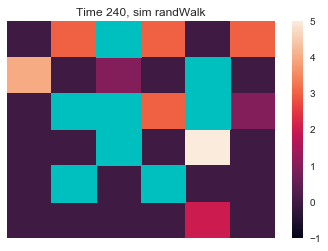

Subtracting sink


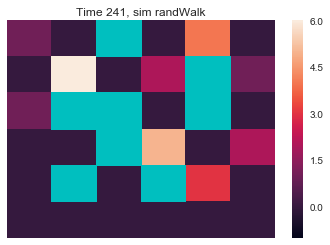

Subtracting sink


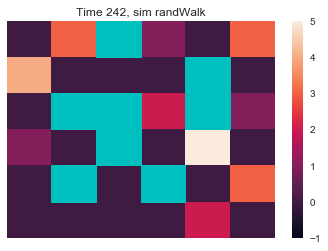

Subtracting sink


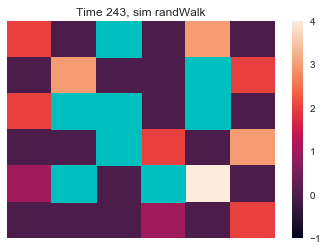

Subtracting sink


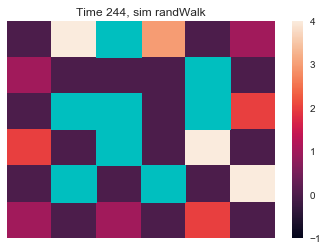

Subtracting sink


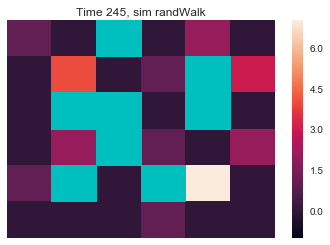

Subtracting sink


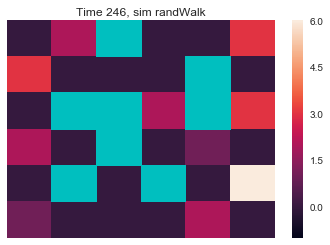

Subtracting sink


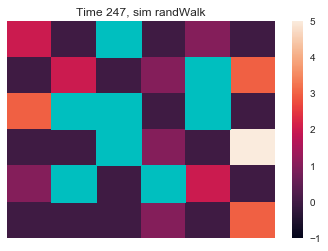

Subtracting sink


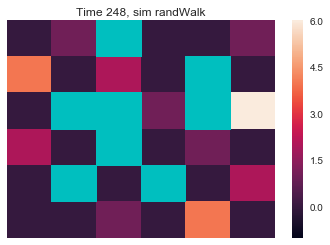

Subtracting sink


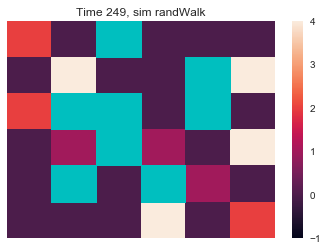

Adding sorce
Subtracting sink


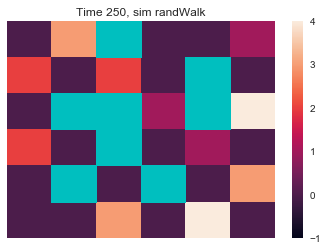

Subtracting sink


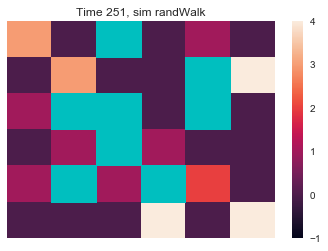

Subtracting sink


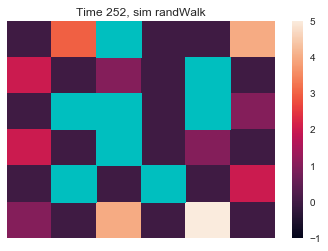

Subtracting sink


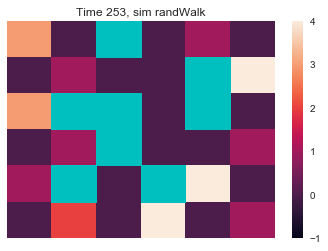

Subtracting sink


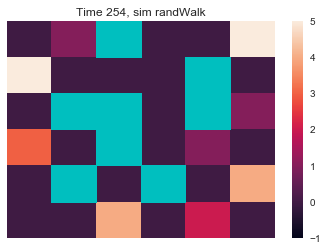

Subtracting sink


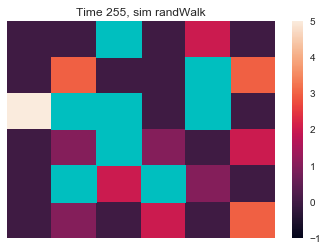

Subtracting sink


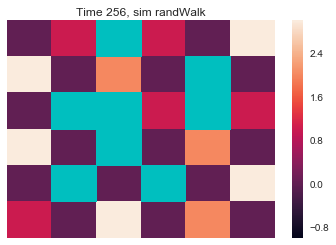

Subtracting sink


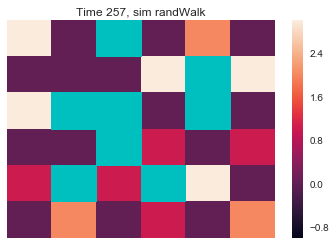

Subtracting sink


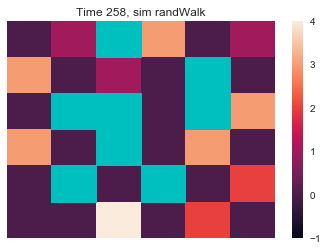

Subtracting sink


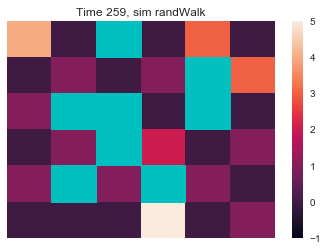

Adding sorce
Subtracting sink


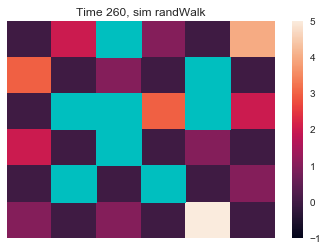

Subtracting sink


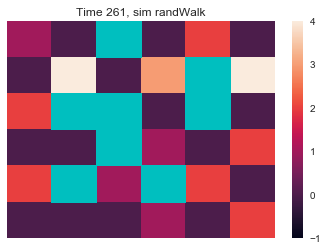

Subtracting sink


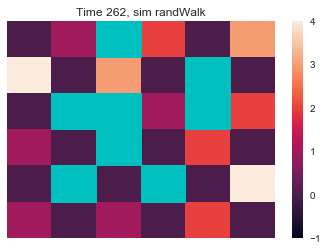

Subtracting sink


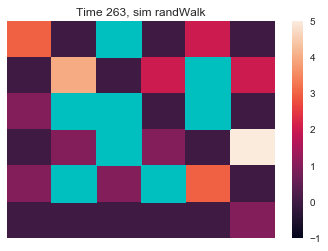

Subtracting sink


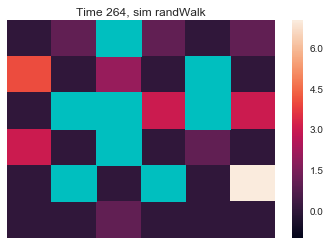

Subtracting sink


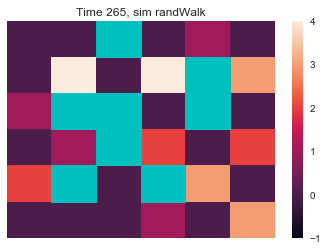

Subtracting sink


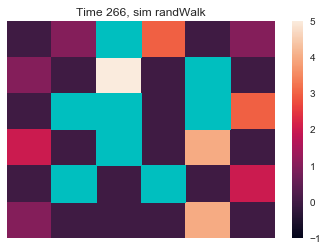

Subtracting sink


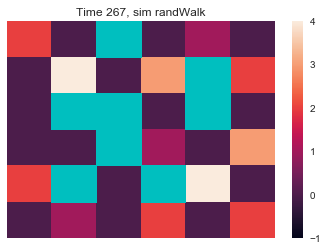

Subtracting sink


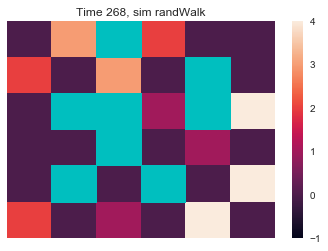

Subtracting sink


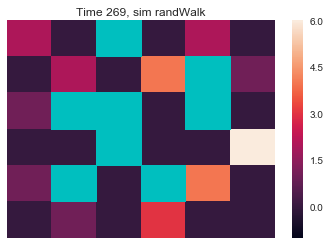

Adding sorce
Subtracting sink


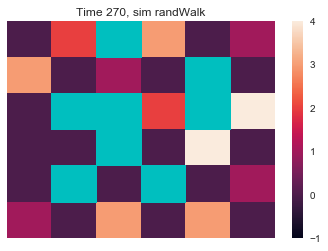

Subtracting sink


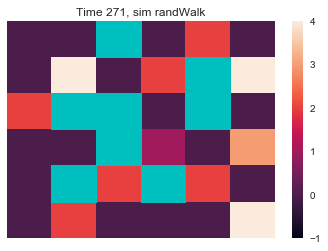

Subtracting sink


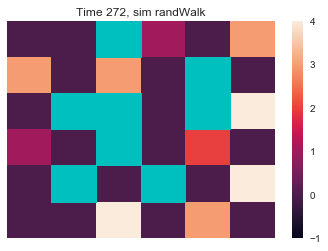

Subtracting sink


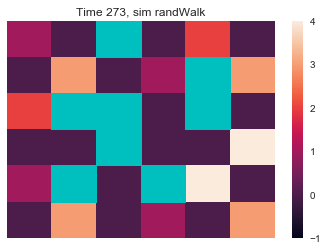

Subtracting sink


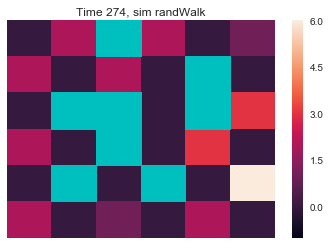

Subtracting sink


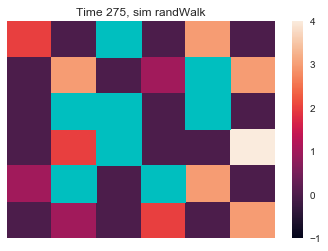

Subtracting sink


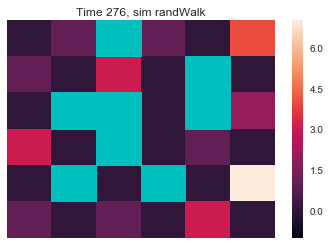

Subtracting sink


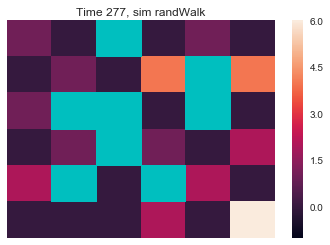

Subtracting sink


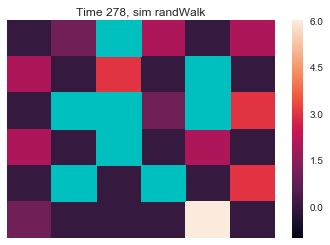

Subtracting sink


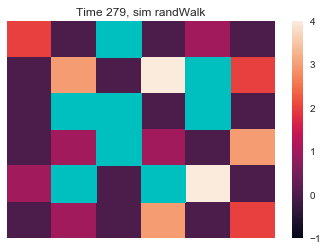

Adding sorce
Subtracting sink


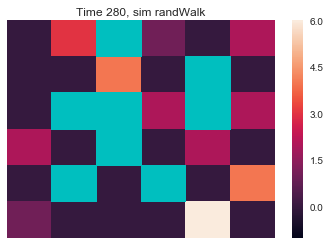

Subtracting sink


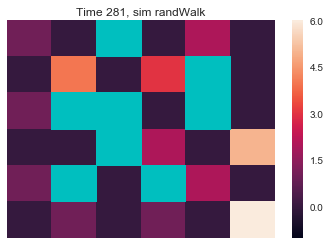

Subtracting sink


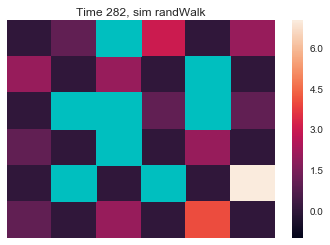

Subtracting sink


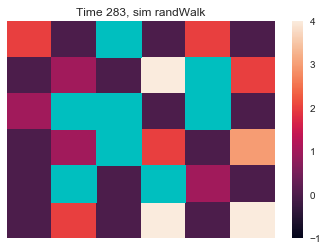

Subtracting sink


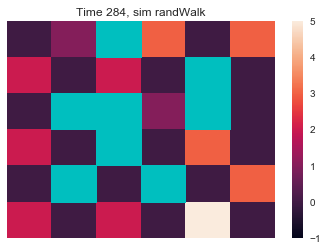

Subtracting sink


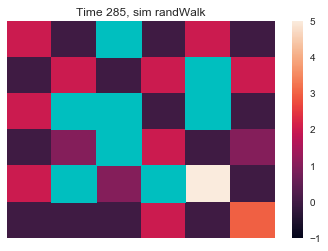

Subtracting sink


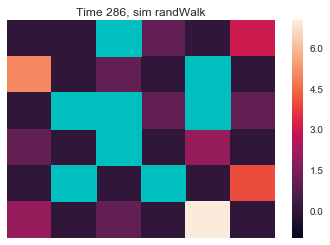

Subtracting sink


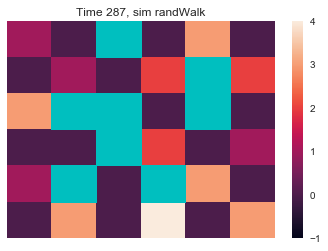

Subtracting sink


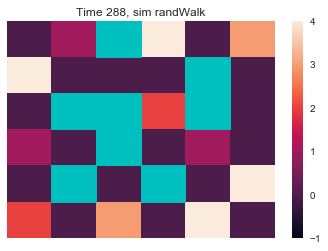

Subtracting sink


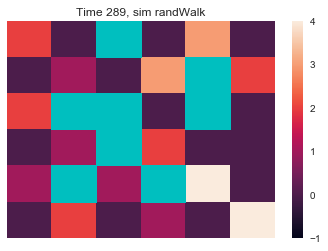

Adding sorce
Subtracting sink


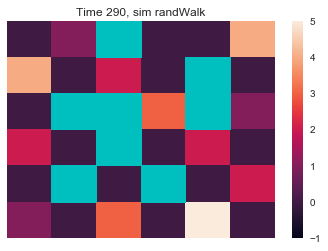

Subtracting sink


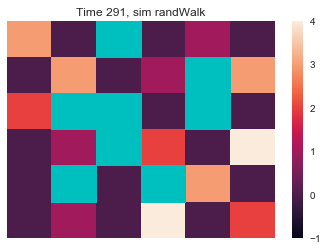

Subtracting sink


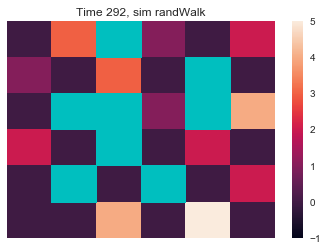

Subtracting sink


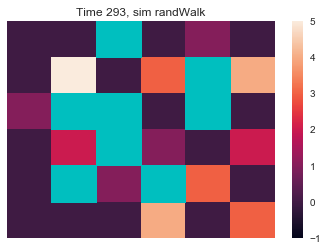

Subtracting sink


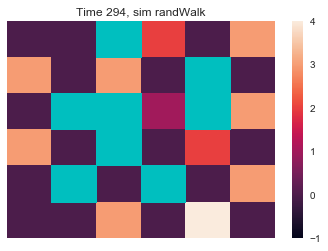

Subtracting sink


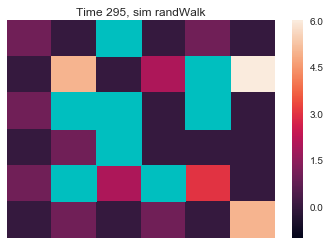

Subtracting sink


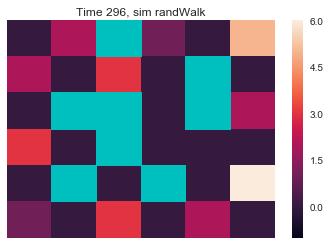

Subtracting sink


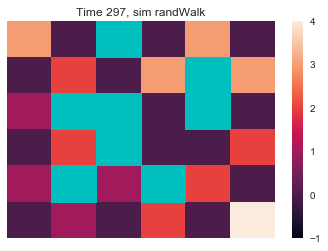

Subtracting sink


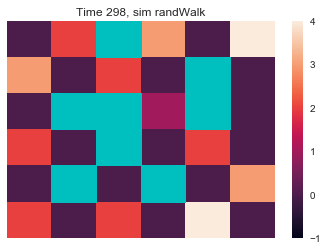

Subtracting sink


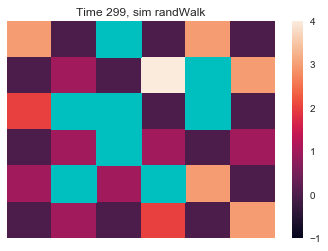

In [10]:
runSim(sim, timeEnd)

[[ 0.          0.         -1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.27272727 -1.          0.        ]
 [ 0.         -1.         -1.          0.54545455 -1.          0.        ]
 [ 0.          0.         -1.          0.18181818  0.09090909  0.        ]
 [ 0.         -1.          0.         -1.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


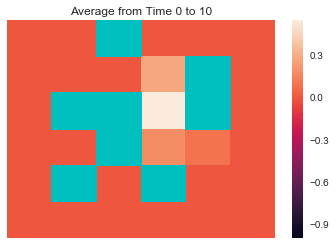

In [11]:
average(0, 10)

[[ 0.18811881  0.25742574 -1.          0.22772277  0.25742574  0.22772277]
 [ 0.20792079  0.2970297   0.14851485  0.36633663 -1.          0.21782178]
 [ 0.07920792 -1.         -1.          0.53465347 -1.          0.23762376]
 [ 0.10891089  0.03960396 -1.          0.36633663  0.21782178  0.16831683]
 [ 0.10891089 -1.          0.04950495 -1.          0.21782178  0.13861386]
 [ 0.14851485  0.11881188  0.18811881  0.14851485  0.18811881  0.0990099 ]]


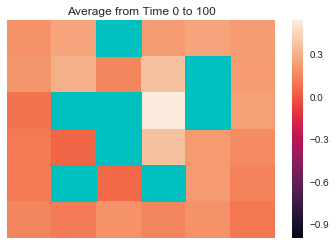

In [12]:
average(0, 100)

[[ 0.73   0.67  -1.     0.78   0.815  0.89 ]
 [ 1.055  1.015  0.74   1.145 -1.     0.975]
 [ 0.56  -1.    -1.     0.815 -1.     0.85 ]
 [ 0.57   0.24  -1.     0.65   0.9    1.06 ]
 [ 0.25  -1.     0.22  -1.     0.995  1.1  ]
 [ 0.23   0.275  0.645  0.59   1.005  0.73 ]]


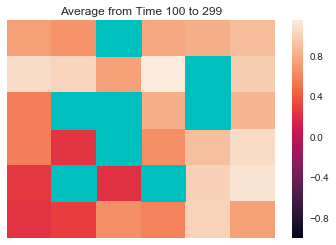

In [13]:
average(100, 299)